In [1]:
import sklearn
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import PolynomialFeatures
import numpy as np

<AxesSubplot:xlabel='Stars', ylabel='Frequency'>

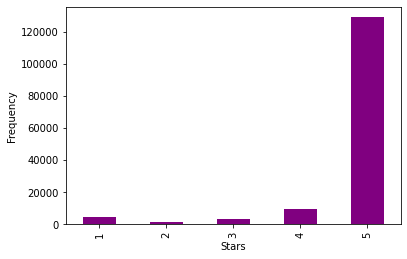

In [3]:
df = pd.read_csv('amazon_reviews_us_Gift_Card_v1_00.tsv', delimiter='\t')
level_ratings = df['star_rating'].value_counts().sort_index()
level_ratings.plot(color=['purple'], kind ='bar', xlabel = 'Stars', ylabel = 'Frequency')

In [32]:
def lengthreview(input):
    result =[]
    result = input['review_body']
    result = result.str.split().str.len()
    result = result.fillna(0)
    result= result.to_numpy().astype(float)
    return result

def verifiedpurchase(input): 
    return [1 if input['verified_purchase'][i]=='Y' else 0 for i in range (len(input))]
    return result



In [33]:
# Create a new dataframe with the 2 features and ground truth values
df_lr = pd.DataFrame()
df_lr['star_rating'] = df['star_rating'] 
df_lr['verified_purchase'] = verifiedpurchase(df)
df_lr['length_review'] = lengthreview(df)


x = df_lr[{'verified_purchase', 'length_review'}]
y = df_lr['star_rating']
model = LinearRegression().fit(x,y)

print('Theta 0 is ' + str(model.intercept_))
print('Theta 1 is  ' + str(model.coef_[1]))
print('Theta 2 is  ' + str(model.coef_[0]))

Theta 0 is 4.854960427901718
Theta 1 is  0.0446965527816378
Theta 2 is  -0.0067940612591762695


In [37]:
df_lr_seperate = pd.DataFrame()
df_lr_seperate['star_rating'] = df['star_rating'] 
df_lr_seperate['verified_purchase'] = verifiedpurchase(df)
df_lr_seperate['length_review'] = lengthreview(df)


x_seperate = df_lr_seperate[{'verified_purchase','length_review'}]
y_seperate = df_lr_seperate['star_rating']
x_train_seperate, x_test_seperate, y_train2_seperate, y_test_seperate = \
    train_test_split(x_seperate,y_seperate,  shuffle = False, test_size = 0.1,)
model_2 = LinearRegression().fit(x_train_seperate,y_train2_seperate)

y_pred_train2_seperate = model_2.predict(x_train_seperate)
y_pred_test_seperate = model_2.predict(x_test_seperate)
mse_train_seperate = mean_squared_error(y_train2_seperate, y_pred_train2_seperate)
mse_test_seperate = mean_squared_error(y_test_seperate, y_pred_test_seperate)

print('The MSE/ bias of the training set: ' + str(mse_train_seperate))
print('The MSE/ bias of the test set: ' + str(mse_test_seperate))

The MSE/ bias of the training set: 0.6200459805833953
The MSE/ bias of the test set: 0.9568183676497632


In [39]:
df_lr['helpful_votes'] = df['helpful_votes']
df_lr['total_votes'] = df['total_votes']
y = df_lr['star_rating']
x = df_lr[['verified_purchase','length_review', \
              'helpful_votes', 'total_votes']]


polynomial_features = PolynomialFeatures(2)
x_polynomial = polynomial_features.fit_transform(x)

x_training, x_test, y_training, y_test = \
    train_test_split(x_polynomial, y, test_size = 0.1, shuffle = False)

model_3 = LinearRegression()
model_3.fit(x_training, y_training)

feature_vec = polynomial_features.get_feature_names()
y_pred_train = model_3.predict(x_training)
y_pred_test = model_3.predict(x_test)
mse_train = mean_squared_error(y_training, y_pred_train)
mse_test = mean_squared_error(y_test, y_pred_test)

print('The MSE/ bias of the training set: ' + str(round(mse_train,3)))
print('The MSE/ bias of the test set:: ' + str(round(mse_test,3)))
print('The feature vector is the following: \n' + str(feature_vec))

The MSE/ bias of the training set: 0.594
The MSE/ bias of the test set:: 1.06
Thee Feature vector: 
['1', 'x0', 'x1', 'x2', 'x3', 'x0^2', 'x0 x1', 'x0 x2', 'x0 x3', 'x1^2', 'x1 x2', 'x1 x3', 'x2^2', 'x2 x3', 'x3^2']


/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)
